In [2]:
import pandas as pd

df = pd.read_csv(r"C:\Users\ankit\Downloads\ds_stocks.csv",encoding='latin-1')

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-07-12,265.880005,265.940002,252.039993,253.669998,251.241440,35868500
1,2022-07-13,250.190002,253.550003,248.110001,252.720001,250.300552,29497400
2,2022-07-14,250.570007,255.139999,245.940002,254.080002,251.647537,25102800
3,2022-07-15,255.720001,260.369995,254.770004,256.720001,254.262253,29774100
4,2022-07-18,259.750000,260.839996,253.300003,254.250000,251.815872,20975000
...,...,...,...,...,...,...,...
247,2023-07-06,337.299988,342.989990,335.500000,341.269989,341.269989,28161200
248,2023-07-07,339.320007,341.790009,337.000000,337.220001,337.220001,21185300
249,2023-07-10,334.600006,335.230011,327.589996,331.829987,331.829987,32791400
250,2023-07-11,331.059998,332.859985,327.000000,332.470001,332.470001,26698200


In [3]:
df = df[['Date', 'Close']]

df

,Date,Close
0,2022-07-12,253.669998
1,2022-07-13,252.720001
2,2022-07-14,254.080002
3,2022-07-15,256.720001
4,2022-07-18,254.250000
...,...,...
247,2023-07-06,341.269989
248,2023-07-07,337.220001
249,2023-07-10,331.829987
250,2023-07-11,332.470001


In [4]:
df['Date']

0      2022-07-12
1      2022-07-13
2      2022-07-14
3      2022-07-15
4      2022-07-18
          ...    
247    2023-07-06
248    2023-07-07
249    2023-07-10
250    2023-07-11
251    2023-07-12
Name: Date, Length: 252, dtype: object

In [5]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [6]:
df

,Date,Close
0,2022-07-12,253.669998
1,2022-07-13,252.720001
2,2022-07-14,254.080002
3,2022-07-15,256.720001
4,2022-07-18,254.250000
...,...,...
247,2023-07-06,341.269989
248,2023-07-07,337.220001
249,2023-07-10,331.829987
250,2023-07-11,332.470001


In [7]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

C:\Users\ankit\AppData\Local\Temp\ipykernel_1176\2565755782.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0     2022-07-12
1     2022-07-13
2     2022-07-14
3     2022-07-15
4     2022-07-18
         ...    
247   2023-07-06
248   2023-07-07
249   2023-07-10
250   2023-07-11
251   2023-07-12
Name: Date, Length: 252, dtype: datetime64[ns]

In [8]:
df.index = df.pop('Date')
df

,Close
Date,
2022-07-12,253.669998
2022-07-13,252.720001
2022-07-14,254.080002
2022-07-15,256.720001
2022-07-18,254.250000
...,...
2023-07-06,341.269989
2023-07-07,337.220001
2023-07-10,331.829987


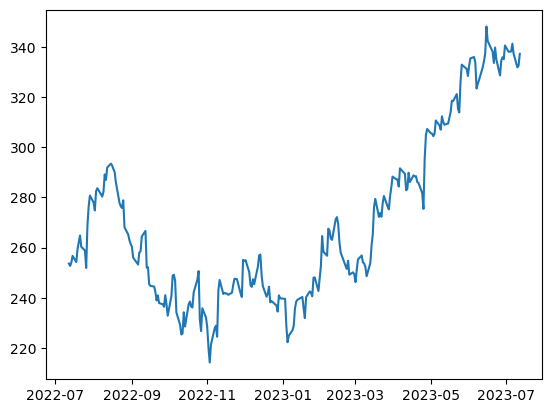

In [9]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [12]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df, 
                                '2022-07-15	', 
                                '2023-07-10	', 
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2022-07-15,253.669998,252.720001,254.080002,256.720001
1,2022-07-18,252.720001,254.080002,256.720001,254.250000
2,2022-07-19,254.080002,256.720001,254.250000,259.529999
3,2022-07-20,256.720001,254.250000,259.529999,262.269989
4,2022-07-21,254.250000,259.529999,262.269989,264.839996
...,...,...,...,...,...
242,2023-07-03,335.850006,335.049988,340.540009,337.989990
243,2023-07-05,335.049988,340.540009,337.989990,338.149994
244,2023-07-06,340.540009,337.989990,338.149994,341.269989
245,2023-07-07,337.989990,338.149994,341.269989,337.220001


In [13]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((247,), (247, 3, 1), (247,))

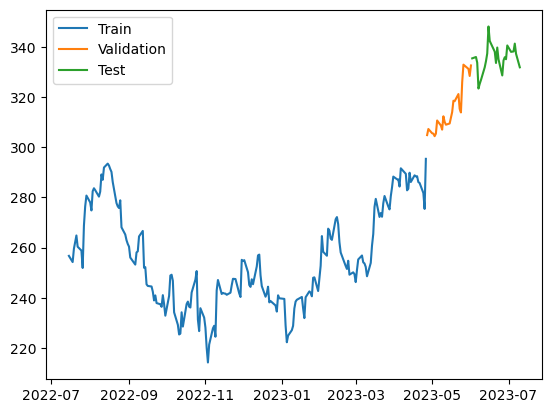

In [14]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])